<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

### <b> <span style='color:#16C2D5'>|</span> Business Objectives</b>
1. Build a robust time series model leveraging market indicators to forecast future EABL stock prices. 
2. Investigate viability of investing in EABL stock prices. 
3. Build an anomally detection system to identify unusual or unexpected patterns in EABL stock prices. 

In [2]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [16]:
import pandas as pd
df = pd.read_csv('Data/EABL-2006-2024_JAN_STOCKS.csv')
# Remove trailing spaces in column names
df.columns = df.columns.str.strip()
df.head()

,Date,Open,High,Low,Close,Average,Volume
0,2024-01-31,104.00,111.00,104.0,110.0,106.00,42000
1,2024-01-30,105.00,105.00,101.0,104.0,104.00,15600
2,2024-01-29,105.00,105.00,99.0,103.5,100.00,596100
3,2024-01-26,116.25,116.25,100.0,100.0,104.50,60500
4,2024-01-25,119.75,120.00,118.0,118.0,118.25,5700


In [20]:
# Extract day, month, and year from the 'Date' column.
# helps capture potential seasonality patterns

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()


,Date,Open,High,Low,Close,Average,Volume,Day,Month,Year
0,2024-01-31,104.00,111.00,104.0,110.0,106.00,42000,31,1,2024
1,2024-01-30,105.00,105.00,101.0,104.0,104.00,15600,30,1,2024
2,2024-01-29,105.00,105.00,99.0,103.5,100.00,596100,29,1,2024
3,2024-01-26,116.25,116.25,100.0,100.0,104.50,60500,26,1,2024
4,2024-01-25,119.75,120.00,118.0,118.0,118.25,5700,25,1,2024


In [26]:
# Calculate daily price changes and percentage changes.

df['Price_Diff'] = df['Close'].diff()
df['Price_Percent_Change'] = df['Close'].pct_change() * 100
df.head()

,Date,Open,High,Low,Close,Average,Volume,Day,Month,Year,Price_Diff,Price_Percent_Change
0,2024-01-31,104.00,111.00,104.0,110.0,106.00,42000,31,1,2024,NaN,NaN
1,2024-01-30,105.00,105.00,101.0,104.0,104.00,15600,30,1,2024,-6.0,-5.454545
2,2024-01-29,105.00,105.00,99.0,103.5,100.00,596100,29,1,2024,-0.5,-0.480769
3,2024-01-26,116.25,116.25,100.0,100.0,104.50,60500,26,1,2024,-3.5,-3.381643
4,2024-01-25,119.75,120.00,118.0,118.0,118.25,5700,25,1,2024,18.0,18.000000


In [27]:
# moving averages for different windows to smooth out fluctuations
# 7-day, 30-day)
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()


In [31]:
# standard deviation to capture volatility
# 7-day MA crossing above 30-day MA
df['Volatility'] = df['Close'].pct_change().rolling(window=7).std()


In [30]:
# binary signals based on price crossovers
df['Signal'] = 0
df.loc[df['MA_7'] > df['MA_30'], 'Signal'] = 1
df.loc[df['MA_7'] < df['MA_30'], 'Signal'] = -1


In [36]:
df.head(15)

,Date,Open,High,Low,Close,Average,Volume,Day,Month,Year,Price_Diff,Price_Percent_Change,MA_7,MA_30,Volatility,Signal
0,2024-01-31,104.00,111.00,104.00,110.0,106.00,42000,31,1,2024,NaN,NaN,NaN,NaN,NaN,0
1,2024-01-30,105.00,105.00,101.00,104.0,104.00,15600,30,1,2024,-6.0,-5.454545,NaN,NaN,NaN,0
2,2024-01-29,105.00,105.00,99.00,103.5,100.00,596100,29,1,2024,-0.5,-0.480769,NaN,NaN,NaN,0
3,2024-01-26,116.25,116.25,100.00,100.0,104.50,60500,26,1,2024,-3.5,-3.381643,NaN,NaN,NaN,0
4,2024-01-25,119.75,120.00,118.00,118.0,118.25,5700,25,1,2024,18.0,18.000000,NaN,NaN,NaN,0
5,2024-01-24,115.00,120.00,115.00,120.0,116.50,9700,24,1,2024,2.0,1.694915,NaN,NaN,NaN,0
6,2024-01-23,117.00,117.00,117.00,117.0,117.00,1200,23,1,2024,-3.0,-2.500000,110.357143,NaN,NaN,0
7,2024-01-22,118.00,123.00,115.25,117.0,117.00,900,22,1,2024,0.0,0.000000,111.357143,NaN,0.078068,0
8,2024-01-19,118.00,118.00,118.00,118.0,118.00,3200,19,1,2024,1.0,0.854701,113.357143,NaN,0.072660,0
9,2024-01-18,118.00,124.75,118.00,120.0,120.00,263800,18,1,2024,2.0,1.694915,115.714286,NaN,0.071869,0


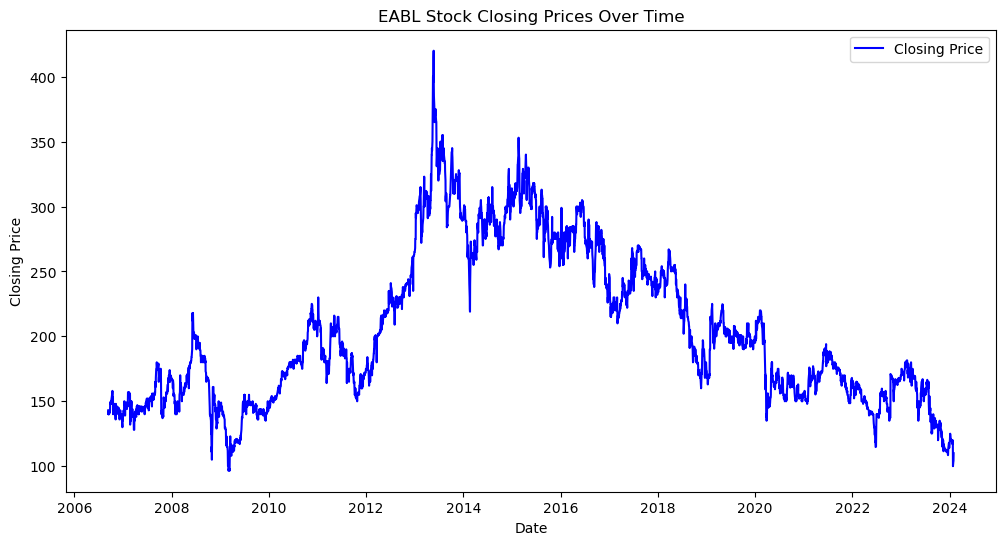

In [39]:
# Plot the closing prices over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('EABL Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [40]:
# Plot the daily price differences.
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='EABL Stock Candlestick Chart')
fig.show()


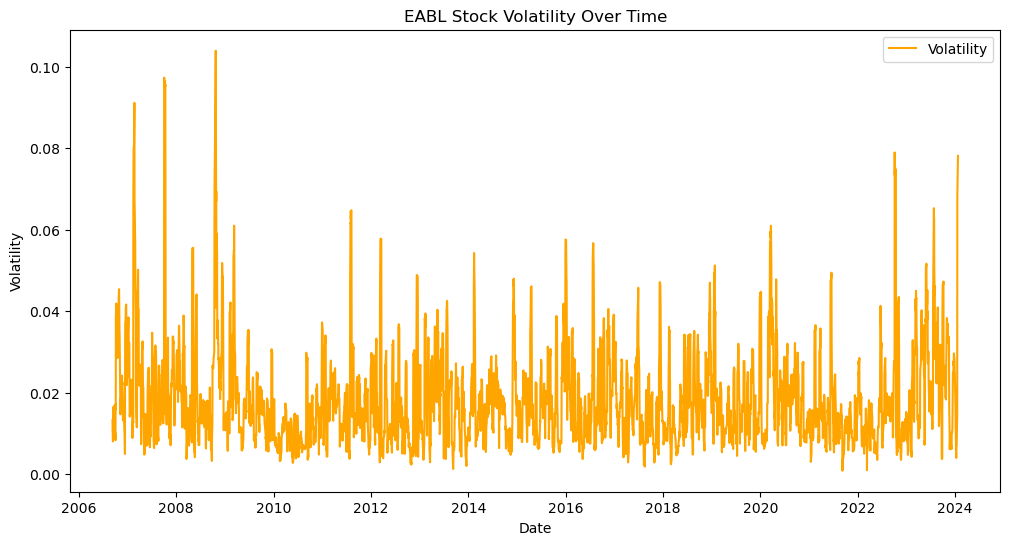

In [41]:
# Plot the volatility over time.
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='orange')
plt.title('EABL Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

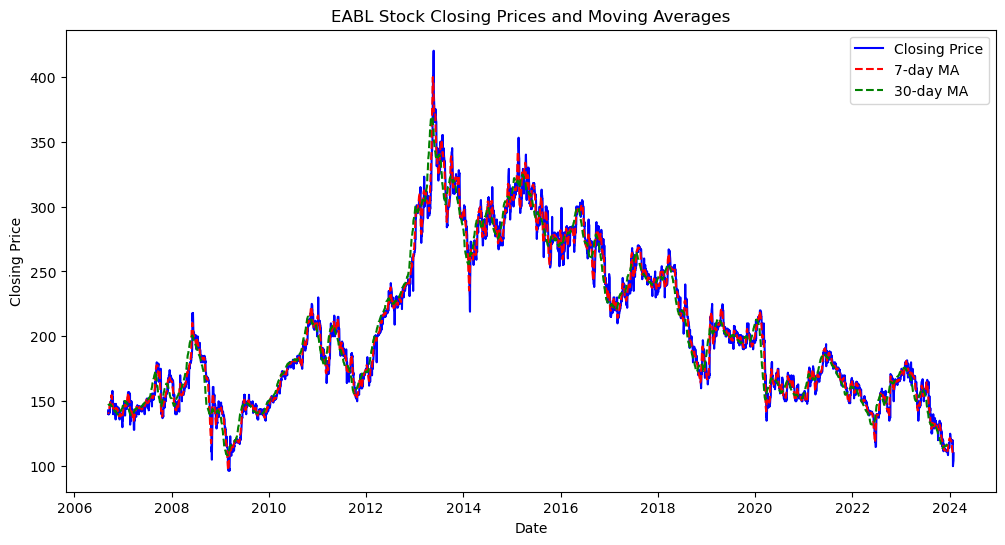

In [42]:
# Plot the closing prices along with moving averages

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['MA_7'], label='7-day MA', color='red', linestyle='--')
plt.plot(df['Date'], df['MA_30'], label='30-day MA', color='green', linestyle='--')
plt.title('EABL Stock Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


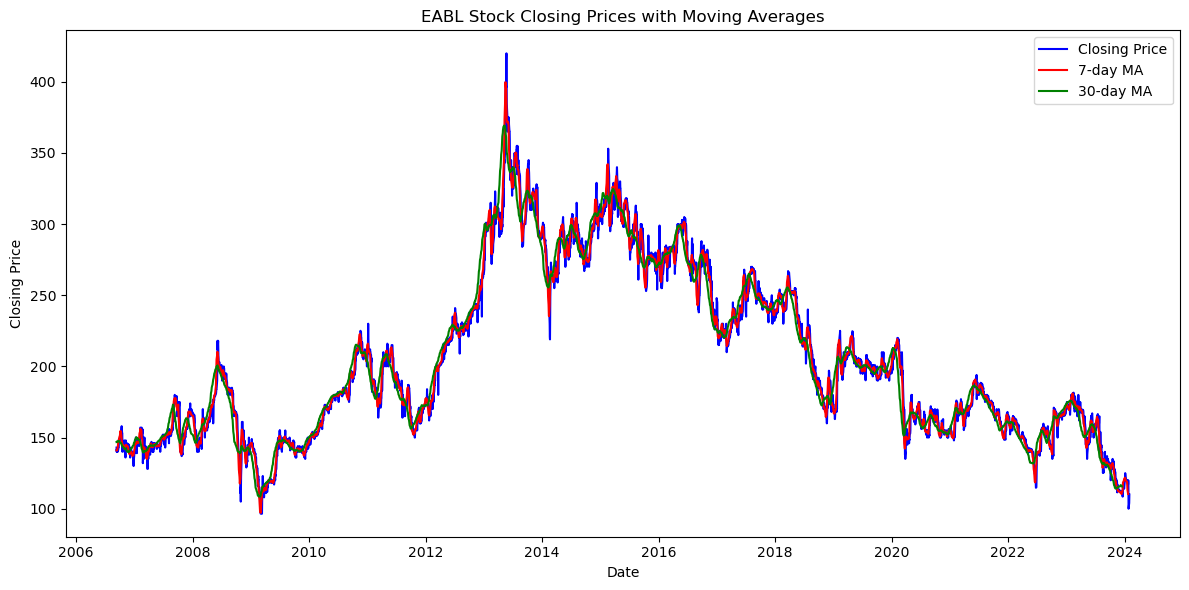

In [48]:
# Time Series Plot with Trendline

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df, label='Closing Price', color='blue')
sns.lineplot(x='Date', y='MA_7', data=df, label='7-day MA', color='red')
sns.lineplot(x='Date', y='MA_30', data=df, label='30-day MA', color='green')
plt.title('EABL Stock Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()


In [50]:
# Candlestick Plot with Plotly Express

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='EABL Stock Candlestick Chart')
fig.show()



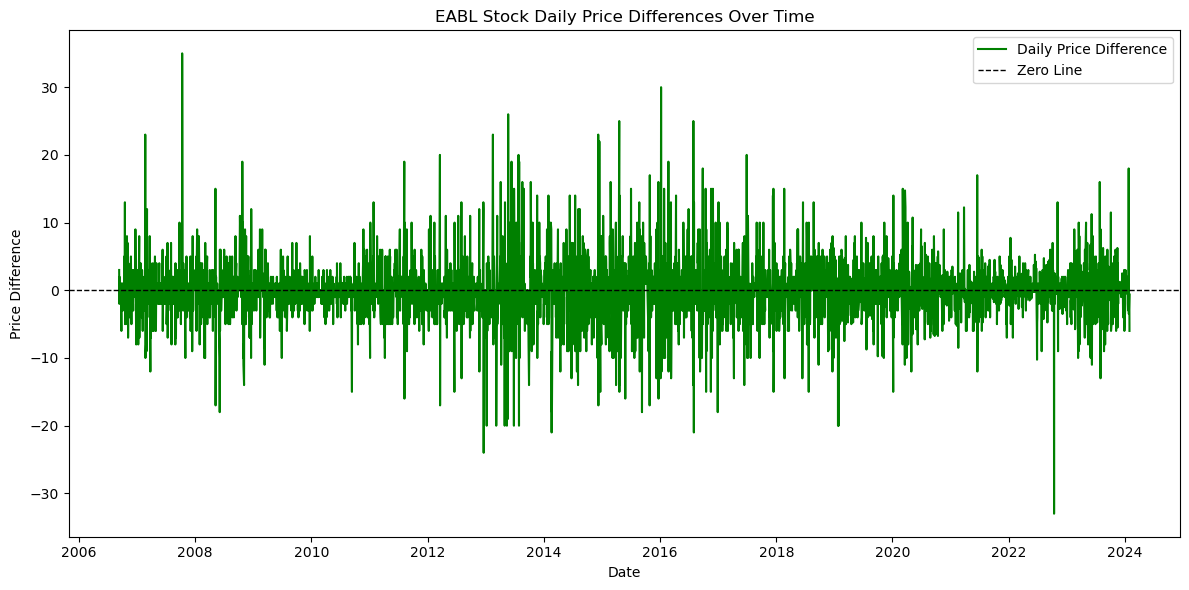

In [51]:
# Price Difference Plot with Horizontal Line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price_Diff', data=df, label='Daily Price Difference', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
plt.title('EABL Stock Daily Price Differences Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.tight_layout()
plt.show()


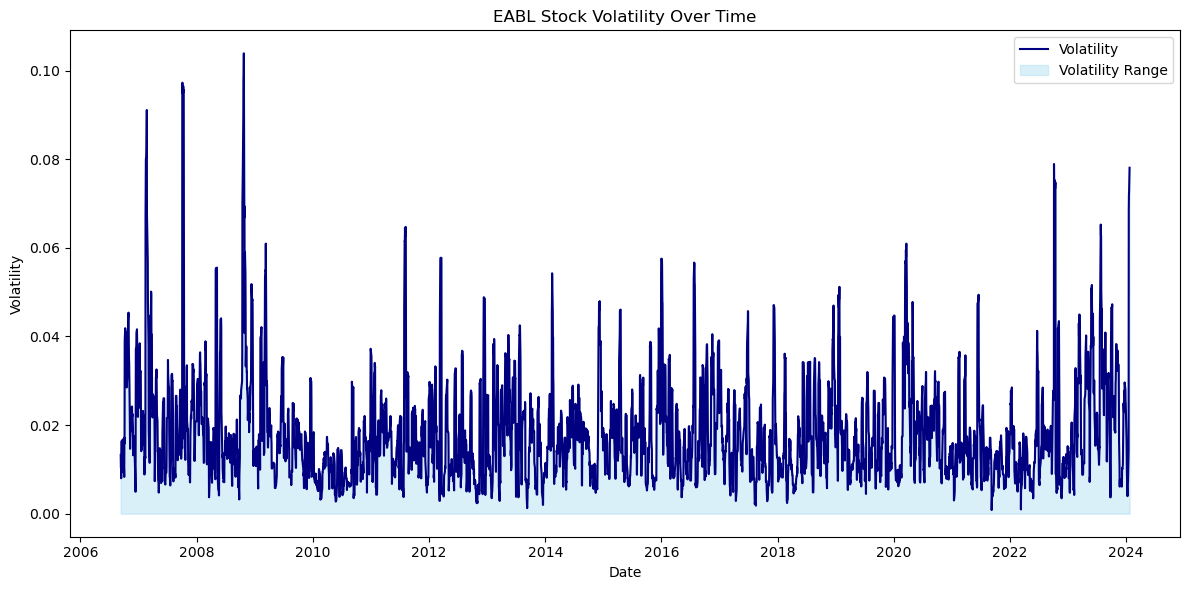

In [53]:
# Volatility Plot with Shaded Regions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volatility', data=df, label='Volatility', color='navy')
plt.fill_between(df['Date'], 0, df['Volatility'], color='skyblue', alpha=0.3, label='Volatility Range')
plt.title('EABL Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()



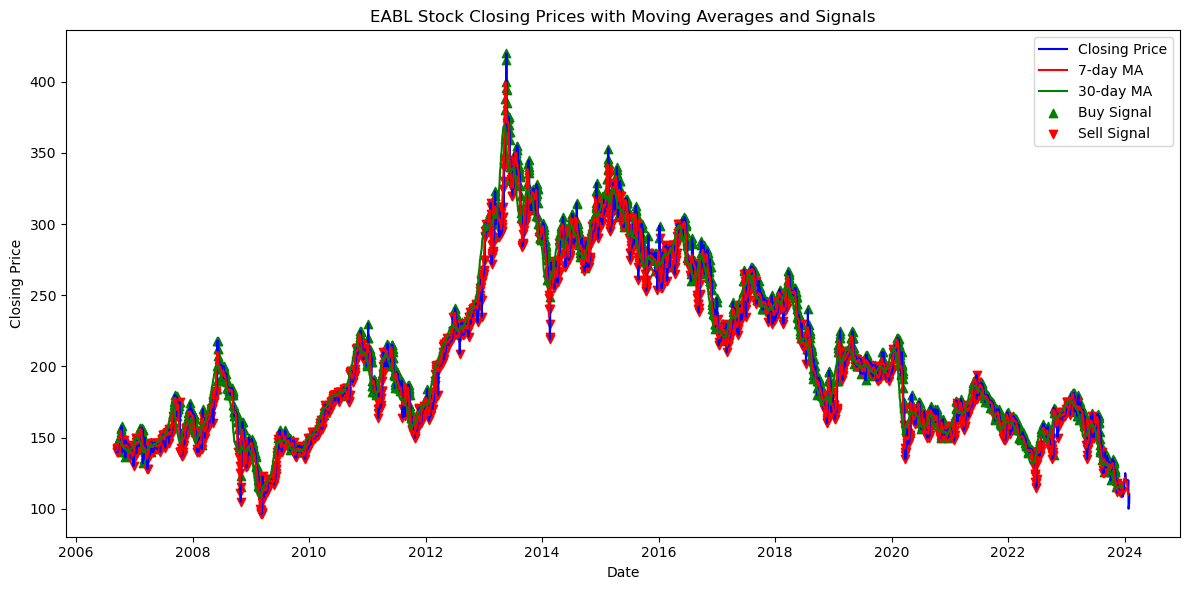

In [54]:
# Moving Averages Plot with Highlighted Signal Points
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df, label='Closing Price', color='blue')
sns.lineplot(x='Date', y='MA_7', data=df, label='7-day MA', color='red')
sns.lineplot(x='Date', y='MA_30', data=df, label='30-day MA', color='green')
plt.scatter(df.loc[df['Signal'] == 1, 'Date'], df.loc[df['Signal'] == 1, 'Close'], marker='^', color='green', label='Buy Signal')
plt.scatter(df.loc[df['Signal'] == -1, 'Date'], df.loc[df['Signal'] == -1, 'Close'], marker='v', color='red', label='Sell Signal')
plt.title('EABL Stock Closing Prices with Moving Averages and Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
df1 = pd.read_csv('Data/Inflation Rates.csv')
df1.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,December,7.67,6.63
1,2023,November,7.87,6.80
2,2023,October,8.10,6.92
3,2023,September,8.32,6.78
4,2023,August,8.52,6.73


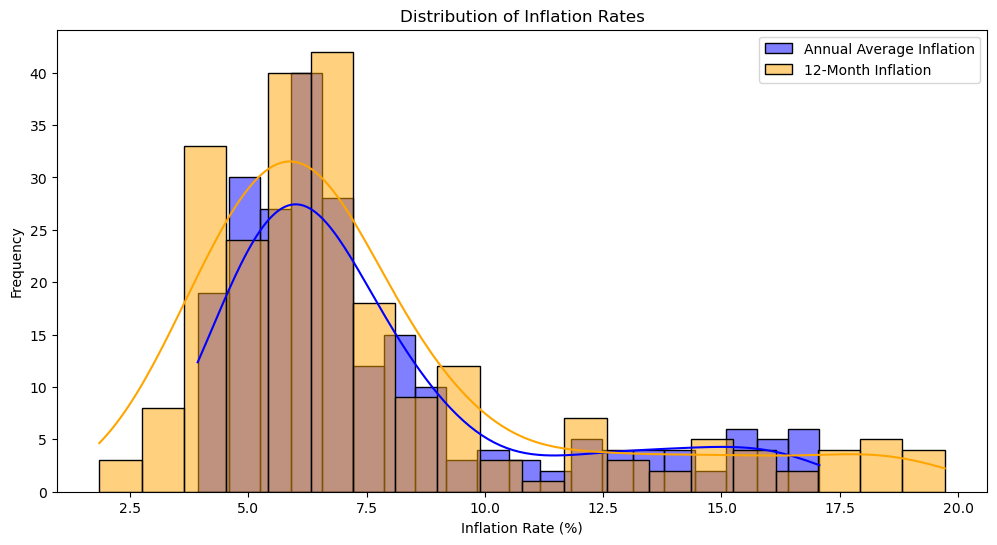

In [55]:
# Distribution of Annual Average Inflation and 12-Month Inflation
plt.figure(figsize=(12, 6))
sns.histplot(df1['Annual Average Inflation'], bins=20, kde=True, color='blue', label='Annual Average Inflation')
sns.histplot(df1['12-Month Inflation'], bins=20, kde=True, color='orange', label='12-Month Inflation')
plt.title('Distribution of Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

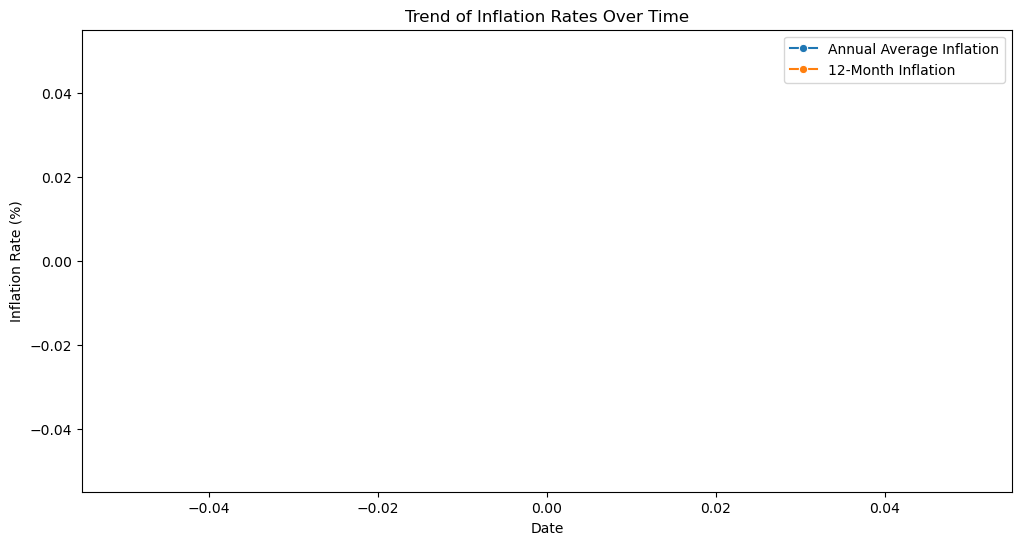

In [61]:
# Line plot for trend over time
df1['Date'] = pd.to_datetime(df1[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Annual Average Inflation', data=df1, marker='o', label='Annual Average Inflation')
sns.lineplot(x='Date', y='12-Month Inflation', data=df1, marker='o', label='12-Month Inflation')
plt.title('Trend of Inflation Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

In [68]:
import pandas as pd
df2 = pd.read_csv('Data/Annual GDP.csv')
df2

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2022,"13,483,003",4.8,"9,851,329"
1,2021,"12,027,662",7.6,"9,395,942"
2,2020,"10,715,070",-0.3,"8,733,060"
3,2019,"10,237,727",5.1,"8,756,946"
4,2018,"9,340,307",5.6,"8,330,891"
5,2017,"8,483,396",3.8,"7,885,521"
6,2016,"7,594,064",4.2,"7,594,064"
7,2015,"6,884,317",5.0,"7,287,024"
8,2014,"6,003,835",5.0,"6,942,157"
9,2013,"5,311,322",3.8,"6,610,312"


In [62]:
# Convert 'Nominal GDP prices' and 'Real GDP prices' to numeric
df2['Nominal GDP prices (Ksh Million)'] = pd.to_numeric(df2['Nominal GDP prices (Ksh Million)'].str.replace(',', ''))
df2['Real GDP prices (Ksh Million)'] = pd.to_numeric(df2['Real GDP prices (Ksh Million)'].str.replace(',', ''))

# Feature Engineering: GDP Growth Rate
df2['GDP Growth Rate'] = df2['Annual GDP growth (%)'] / 100

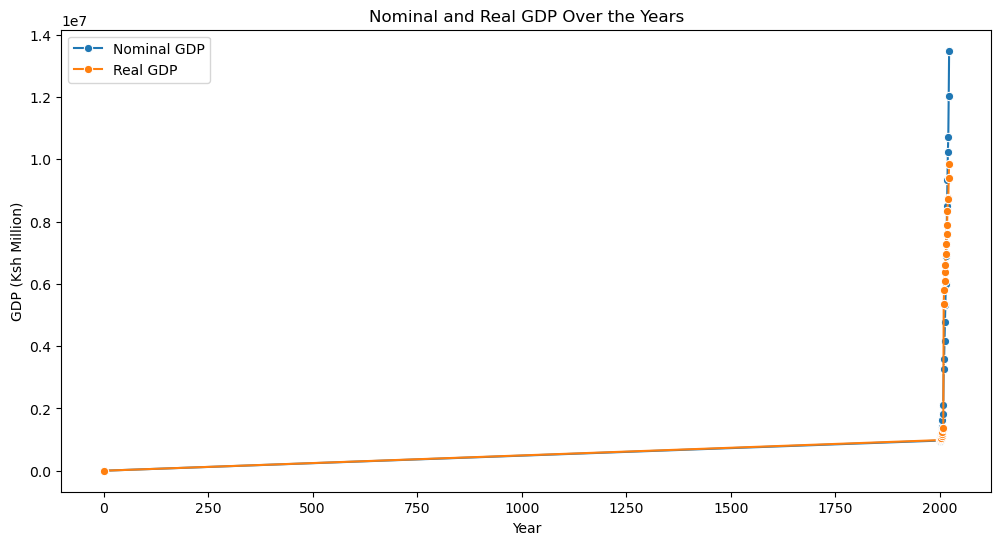

In [63]:
# Line plot for Nominal and Real GDP over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Nominal GDP prices (Ksh Million)', data=df2, marker='o', label='Nominal GDP')
sns.lineplot(x='Year', y='Real GDP prices (Ksh Million)', data=df2, marker='o', label='Real GDP')
plt.title('Nominal and Real GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Ksh Million)')
plt.legend()
plt.show()

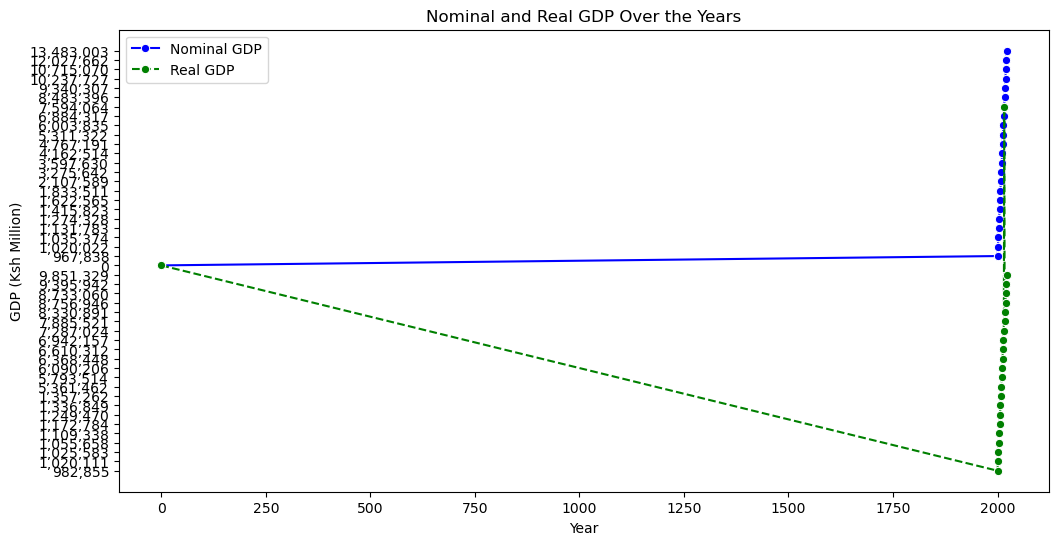

In [70]:
# Line plot for Nominal and Real GDP over the years with improved clarity
plt.figure(figsize=(12, 6))

# Plot Nominal GDP with blue solid line
sns.lineplot(x='Year', y='Nominal GDP prices (Ksh Million)', data=df2, marker='o', color='blue', label='Nominal GDP')

# Plot Real GDP with green dashed line
sns.lineplot(x='Year', y='Real GDP prices (Ksh Million)', data=df2, marker='o', color='green', linestyle='dashed', label='Real GDP')

plt.title('Nominal and Real GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Ksh Million)')
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_16000\3988866641.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




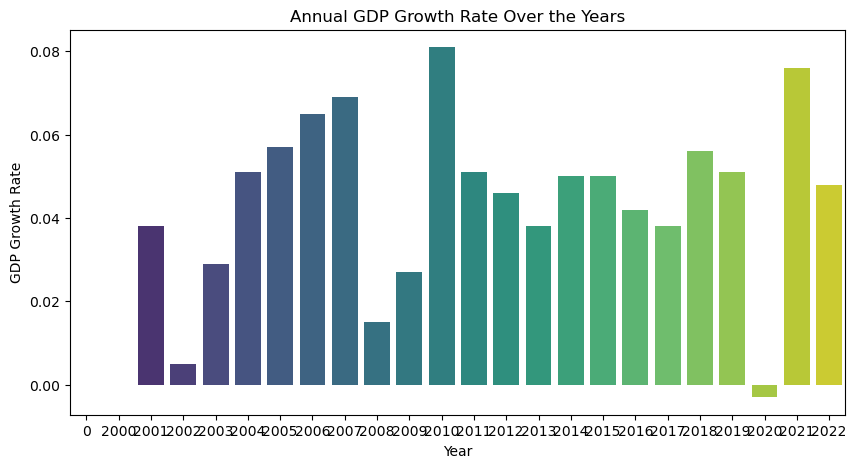

In [64]:
# Bar plot for GDP Growth Rate
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='GDP Growth Rate', data=df2, palette='viridis')
plt.title('Annual GDP Growth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.show()

In [5]:
import pandas as pd
df3 = pd.read_csv('Data/Central Bank Rates.csv')
df3.head()

,YEAR,MONTH,Repo,Reverse Repo,Interbank Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash Reserve Requirement,Central Bank Rate
0,2006,Jan,7.81,-,7.78,8.23,8.84,-,6.0,NaN
1,NaN,Feb,7.78,-,7.73,8.02,8.85,-,6.0,NaN
2,NaN,Mar,7.5,-,7.52,7.60,8.52,-,6.0,NaN
3,NaN,Apr,6.78,-,6.97,7.02,7.36,-,6.0,NaN
4,NaN,May,6.68,-,8.11,7.01,7.48,-,6.0,NaN


In [73]:
# Check for missing values
print(df3.isnull().sum())

YEAR                         0
MONTH                        2
Repo                         6
Reverse Repo                19
Interbank Rate               2
91-Day Tbill                 2
182-days Tbill               2
364-days Tbill               2
Cash Reserve Requirement     2
Central Bank Rate            7
dtype: int64


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df3 = pd.read_csv('Data/Central Bank Rates.csv')

# Display the first few rows of the dataframe
print(df3.head())

# Check for missing values
print(df3.isnull().sum())

# Forward fill missing values in the 'YEAR' column
df3['YEAR'] = df3['YEAR'].ffill()

# Drop rows where 'YEAR' is NaN after forward fill
df3 = df3.dropna(subset=['YEAR'])

# Convert 'YEAR' and 'MONTH' to datetime
df3['Date'] = pd.to_datetime(df3[['YEAR', 'MONTH']].assign(DAY=1))

# Drop unnecessary columns
df3 = df3.drop(['YEAR', 'MONTH'], axis=1)

# Display the cleaned dataframe
print(df3.head())

# Plot Repo Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Repo', data=df3, marker='o', label='Repo Rate')
plt.title('Repo Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Repo Rate')
plt.show()


   YEAR MONTH  Repo            Reverse Repo  Interbank Rate  91-Day Tbill  \
0  2006   Jan  7.81                    -               7.78          8.23   
1   NaN   Feb  7.78                    -               7.73          8.02   
2   NaN   Mar   7.5                    -               7.52          7.60   
3   NaN   Apr  6.78                    -               6.97          7.02   
4   NaN   May  6.68                    -               8.11          7.01   

  182-days Tbill          364-days Tbill  Cash Reserve Requirement  \
0           8.84                    -                          6.0   
1           8.85                    -                          6.0   
2           8.52                    -                          6.0   
3           7.36                    -                          6.0   
4           7.48                    -                          6.0   

   Central Bank Rate  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4

ValueError: Unable to parse string "Source: Central Bank of Kenya" at position 216

In [7]:
import pandas as pd
df4 = pd.read_csv('Data/Dividends-Payout.csv')
df4.head()

,DIVIDENDS,Announced,Book Closure,Payment,Amount
0,Interim Dividend,1/26/2024,2/16/2024,4/26/2024,KES 1.00
1,Final Dividend,7/28/2023,9/15/2023,10/27/2023,KES 1.75
2,Final Dividend,7/28/2023,9/14/2023,10/27/2023,KES 1.75
3,Interim Dividend,1/27/2023,2/16/2023,4/28/2023,KES 3.75
4,Final Dividend,7/28/2022,9/15/2022,10/30/2022,KES 7.25


In [8]:
import pandas as pd
df5 = pd.read_csv('Data/Exchange-rates-CBK.csv')
df5.head()

,Date,Currency,Mean,Buy,Sell
0,4/1/2024,US DOLLAR,157.3912,157.0000,157.7824
1,3/1/2024,US DOLLAR,157.3235,156.9529,157.6941
2,2/1/2024,US DOLLAR,156.9853,156.5000,157.4706
3,29/12/2023,US DOLLAR,156.4618,156.0118,156.9118
4,28/12/2023,US DOLLAR,156.0941,155.6588,156.5294


In [10]:
import pandas as pd
df6 = pd.read_csv('Data/Yearly_unemploymnet_rates.csv')
df6.head()

,Year,Unemployment Rate (%),Annual Change
0,2022,5.50%,-0.14%
1,2021,5.64%,0.03%
2,2020,5.62%,0.61%
3,2019,5.01%,0.77%
4,2018,4.25%,0.73%


In [11]:
import pandas as pd
df7 = pd.read_csv('Data/Inflation Rates (1).csv')
df7.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,December,7.67,6.63
1,2023,November,7.87,6.80
2,2023,October,8.10,6.92
3,2023,September,8.32,6.78
4,2023,August,8.52,6.73
